# Podstawy programowania (AD) 2

## Tomasz Rodak


Wykład IV

# Wypakowywanie obiektów iterowalnych

## Przypisania wielokrotne

* Przypisanie do elementów obiektu iterowalnego można wykonać w jednej linii.
* Liczba obiektów i zmiennych musi się zgadzać.
* Wyrażenia po prawej stronie obliczane są najpierw, dopiero potem wykonane zostają przypisania.

```python
>>> a, b = 0, 1
>>> a, b
(0, 1)
>>> a, b = b, a
>>> a, b
(1, 0)
```

### Przykład: ciąg Fibonacciego

Przypomnijmy definicję: dwa pierwsze wyrazy to `0` i `1`; każdy kolejny jest sumą dwóch poprzednich.

Tak wygląda początek:
```
0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ...
```

Oto implementacja iteracyjna korzystająca z przypisania wielokrotnego:

```python
# Path: src/fib.py
def fib_iter(n):
    """Iteracyjna wersja ciągu Fibonacciego

    Argumenty:
        n (int): liczba całkowita

    Zwraca:
        int: f_n - wartość ciągu o indeksie n
    """
    a, b = 0, 1

    for _ in range(n):
        a, b = b, a + b

    return a
```

```python
>>> [fib(n) for n in range(10)]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
```

### Przykład: NWD

Obliczanie największego wspólnego dzielnika algorytmem Euklidesa:

```python
# Path: src/nwd.py
def nwd(a, b):
    """
    Zwraca największy wspólny dzielnik dwóch liczb.

    Argumenty:
        a, b (int): liczby całkowite
    Zwraca:
        int: nwd(a, b)
    """
    if b < 0:
        b = -b

    while b != 0:
        a, b = b, a % b

    return a
```

```python
>>> nwd(8*5*3, 3*5*7)
15
```

Rozpakowywanie obiektów zagnieżdżonych.

```python
>>> miasto, (lat, lon) = 'Łódź', (51.776667, 19.454722)
>>> miasto, lat, lon
('Łódź', 51.776667, 19.454722)
```

### Zagadka

Jakie wartości mają `a, b, c, d`?

```python
>>> a, ((b, c), d) = -1, [range(2), 2]
```

Rozpakowywanie z jednoczesną iteracją. Częsta sytuacja.

```python
>>> położenia_miast = [('Łódź', (51.776667, 19.454722)),
...                    ('Paryż', (48.866667, 2.35)),
...                    ('Rio de Janeiro', (-22.908333, -43.196389))]
>>> for miasto, (lat, lon) in położenia_miast:
...     print(f'{miasto:15}: {lat:10}, {lon:10}')

Łódź           :  51.776667,  19.454722
Paryż          :  48.866667,       2.35
Rio de Janeiro : -22.908333, -43.196389
```

Zmienne w przypisaniu wielokrotnym mogą się powtarzać. Możliwość ta jest czasem wykorzystywana do pomijania niechcianych wartości.

```python
>>> ignoruj, kurs, zmiana, ignoruj = ['WIG20', 2314.23, -20.73, (2018, 3, 2)]
>>> kurs, zmiana
(2314.23, -20.73)
```

Częściej jako ignorowanej zmiennej używa się podkreślnika (który jest zwykłą nazwą).

```python
>>> _, kurs, zmiana, _ = ['WIG20', 2314.23, -20.73, (2018, 3, 2)]
>>> kurs, zmiana
(2314.23, -20.73)
```

## Użycie `*` do zagarnięcia nadmiarowych elementów

Użycie zmiennej z modyfikatorem `*` po lewej stronie instrukcji przypisania tworzy listę z fragmentem obiektu iterowalnego.

```python
>>> nazwisko, email, *telefony = ['Kowalski', 'kowal@adres.com', '111 222 333', '222 999 888']
>>> nazwisko, email, telefony
('Kowalski', 'kowal@adres.com', ['111 222 333', '222 999 888'])
```

Modyfikator `*` po lewej stronie przypisania musi znajdować się wewnątrz listy lub krotki. Wówczas lewa strona wygląda jak obiekt iterowalny.

Dobrze:

```python
>>> *znaki, = 'ala ma kota'
>>> znaki
['a', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a']
```

Źle:

```python
>>> *znaki = 'ala ma kota'
File "<ipython-input-3-20c1cc3c8226>", line 4
SyntaxError: starred assignment target must be in a list or tuple
```

### Zagadka

Jaką wartość ma zmienna `środek`?

```python
>>> _, *środek, _ = [1, 2, 3, 4, 5, 6]
```

### Zagadka

Jaką wartość ma zmienna `kawałek`?

```python
>>> _, _, *kawałek, _ = [1, 2, 3, 4, 5, 6]
```

### Zagadka

Co robi funkcja `f()`?

```python
def f(seq):
    a, *reszta = seq
    
    if not reszta:
        return a

    return a + f(reszta)
```

### Zagadka

Co robi funkcja `g()`?

```python
def g(seq, a):

    if not seq:
        return a

    b, *reszta = seq
    return g(reszta, a + b)
```

## Użycie `*` do wypakowywania elementów

Użycie `*` przy obiekcie iterowalnym po prawej stronie przypisania wypakowuje jego elementy. Takie użycie `*` jest dozwolone wewnątrz krotki, listy lub wywołania funkcyjnego:

```python
>>> a = *range(5),
>>> a
(0, 1, 2, 3, 4)
```

```python
>>> a = [*range(5)]
>>> a
[0, 1, 2, 3, 4]
```

```python
>>> print(*"ala ma kota", *'monty python')
a l a   m a   k o t a m o n t y   p y t h o n
```

```python
>>> słowa = ['and', 'the', 'Holy', 'Grail']
>>> print('Monty Python', *słowa)
Monty Python and the Holy Grail
```

```python
>>> from random import randint
>>> rzuty = [randint(1, 6) for _ in range(3)]
>>> print('Wylosowałem {}, {} i {}.'.format(*rzuty))
Wylosowałem 6, 2 i 3.
```

Modyfikatory `*` mogą znajdować się po obu stronach przypisania:

```python
>>> a, *b = *'xyz', 'abc'
>>> a, b
('x', ['y', 'z', 'abc'])
```

Wyjaśnienie:

```python
>>> a, *b = *'xyz', 'abc'
```
jest równoważne:
```python
>>> (a, *b) = ('x', 'y', 'z', 'abc')
```

### Zagadka

Czy te przypisania są poprawne? Jaki jest ich efekt?

```python
>>> a, *b = *'xyz', *'abc'
```

```python
>>> *a, b = *'xyz', 'abc'
```

```python
>>> a, b = 'xyz', *'abc'
```

```python
>>> *a, (b, *c) = *'xyz', 'abc'
```

### Wypakowanie słownika

Modyfikator `**` wypakowuje słownik w wywołaniu funkcyjnym:

```python
>>> def f(a, b, c):
...     print(f'a = {a}\nb = {b}\nc = {c}')
>>> kwargs = dict(a=7, b=9, c=2)
>>> f(**kwargs)
a = 7
b = 9
c = 2
```

# Parametry i argumenty

## Parametry

* **Parametry** to nazwy pojawiające się w definicji funkcji (ogólniej, obiektu wywoływalnego). Parametry są nazwami argumentów przekazywanych do funkcji.
* **Argumenty** to wartości przekazywane do funkcji. W ciele funkcji nazwami argumentów są parametry funkcji.

## Rodzaje parametrów

* *pozycyjne lub nazwy*, 
* *jedynie pozycyjne*,
* *pozycyjne zmiennej długości*,
* *jedynie nazwy*,
* *nazwy zmiennej długości*.

## Rodzaje argumentów

* przekazywane *pozycyjnie*,
* przekazywane za pomocą *nazw*.

## Parametry *pozycyjne lub nazwy*

Nazwy parametrów wypisanych w funkcji zdefiniowanej przez użytkownika (o ile nie następuje po nich modyfikator `/` - możliwy w Pythonie >= 3.8). Mogą mieć wartości domyślne i wtedy muszą znajdować się na końcu definicji.

```python
>>> def potęga(podstawa, wykładnik=2):
...     return podstawa ** wykładnik
```

Wywołanie na argumentach przekazywanych pozycyjnie:

```python
>>> potęga(3), potęga(3, 4)
(9, 81)
```

Wywołanie na argumentach przekazanych za pomocą nazw; kolejność przestała mieć znaczenie:

```python
>>> potęga(wykładnik=4, podstawa=3), potęga(podstawa=8)
(81, 64)
```

Nazwy można wypakowywać ze słownika:

```python
>>> d = {'wykładnik': 10, 'podstawa': 2}
>>> potęga(**d)
1024
```

Część argumentów przekazanych pozycyjnie a część przez nazwy; argumenty przekazywane za pomocą nazw muszą następować po pozycyjnych:

```python
>>> potęga(3, wykładnik=4)
81
```

## Parametry *jedynie pozycyjne*

* Argumentów dla tych parametrów nie można podać za pomocą nazw.
* W Pythonie >= 3.8 istnieje składnia pozwalająca definiować funkcje z takimi parametrami (zob. PEP 570)
* Wiele funkcji wbudowanych zawiera parametry *jedynie pozycyjne*.
* W sygnaturze funkcji parametry *jedynie pozycyjne* znajdują się na lewo od znaku `/`.

Wszystkie parametry funkcji `pow()` są *jedynie pozycyjne*.

```python
>>> help(pow)
Help on built-in function pow in module builtins:

pow(x, y, z=None, /)
    Equivalent to x**y (with two arguments) or x**y % z (with three arguments)
    
    Some types, such as ints, are able to use a more efficient algorithm when
    invoked using the three argument form.
```

```python
>>> pow(x=2, y=3)
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-22-2ecadb559749> in <module>
----> 1 pow(x=2, y=3)

TypeError: pow() takes no keyword arguments
```

## Parametr *pozycyjne zmiennej długości*

Jeden parametr pozycyjny, który przechwytuje w krotce wszystkie te argumenty pozycyjne, które nie zostały dopasowane do parametrów poprzedzających.

* Nazwę parametru *pozycyjne zmiennej długości* poprzedzamy gwiazdką `*`.
* W ciele funkcji parametr *pozycyjne zmiennej długości* jest nazwą krotki z przechwyconymi argumentami.

Typowym przykładem wbudowanym jest funkcja `print()` i metoda `format()` -- akceptują dowolną liczbę argumentów.

```python
>>> print("Monty", "Python's", "The", "Meaning", "of", "Life", sep=':')
Monty:Python's:The:Meaning:of:Life
```

### Przykład

Piszemy funkcję zwracającą średnią arytmetyczną. 

```python
>>> def średnia(pierwszy, *reszta):
...     '''Zwraca średnią z argumentów (musi być co najmniej jeden).'''
...     return (pierwszy + sum(reszta)) / (1 + len(reszta))
```

Jeden argument jest obowiązkowy, ilość pozostałych jest dowolna.

```python
>>> średnia(3), średnia(1, 2, 3, 4, 5, 6, 7, 8)
(3.0, 4.5)
```

```python
>>> średnia()
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
/tmp/ipykernel_12643/3589600716.py in <module>
----> 1 średnia()

TypeError: średnia() missing 1 required positional argument: 'pierwszy'
```

## Parametry *jedynie nazwy*

Argumenty do tych parametrów **muszą** zostać przekazane za pomocą nazw. Nazwy te są parametrami w definicji funkcji.

* W definicji funkcji parametry *jedynie nazwy* znajdują się za:
  * parametrem z modyfikatorem `*` (czyli za parametrami *pozycyjne zmiennej długości*), 
  * lub za pojedynczym znakiem `*`.
* Parametry te nie muszą mieć podanej wartości domyślnej.

### Przykład

`min_strażnik()` zwraca minimum `wartości` o ile jest ono `>= strażnik` lub gdy `strażnik` jest `None`. Jeśli minimum `wartości` jest `< strażnik`, to zwracany jest `strażnik`.

```python
>>> def min_strażnik(*wartości, strażnik=None):
...     m = min(wartości)
...     if strażnik is not None:
...         return m if m > strażnik else strażnik
...     return m
```

Jedyny sposób na wyspecyfikowanie strażnika, to podanie go za pomocą słowa kluczowego.

```python
>>> min_strażnik(1, -2, 4, 2, -5, strażnik=0)
0
```

```python
>>> min_strażnik(1, -2, 4, 2, -5)
-2
```

## Parametr *nazwy zmiennej długości*

Jeden parametr, który przechwytuje w słowniku wszystkie te argumenty podawane przez nazwę, które nie zostały dopasowane do parametrów poprzedzających.


* Nazwę parametru *nazwy zmiennej długości* poprzedzamy dwiema gwiazdkami `**`. Nazwa ta musi wystąpić jako ostatnia wśród parametrów funkcji.
* W ciele funkcji parametr *nazwy zmiennej długości* jest słownikiem.

### Przykład

Przechwycenie parametrów stylizujących wykres w funkcji `plt.plot()`. Ten przykład wykonaj w notatniku Jupyter w standardowym środowisku Anaconda.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

def wykres(f, a, b, npoints=100, **kwargs):
    x = np.linspace(a, b, npoints)
    plt.plot(x, f(x), **kwargs)

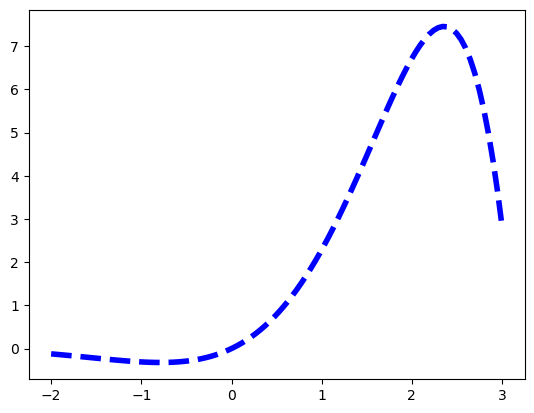

In [2]:
def f(x):
    return np.sin(x) * np.exp(x)

wykres(f, -2, 3, ls='--', color='blue', lw=4)

## Zagadka

Dana jest funkcja:

```python
def f(a, b=None, *c, **d):
    return c
```

Jaką wartość zwróci wywołanie:
```python
f(1, 2, 3, *'abc', e=100)
```

## Do poczytania

[PEP 3132 – Extended Iterable Unpacking](https://www.python.org/dev/peps/pep-3132/)

[PEP 448 – Additional Unpacking Generalizations](https://www.python.org/dev/peps/pep-0448/)

[StackOverflow: Unpacking, extended unpacking and nested extended unpacking](https://stackoverflow.com/questions/6967632/unpacking-extended-unpacking-and-nested-extended-unpacking)

[PEP 570 – Python Positional-Only Parameters](https://peps.python.org/pep-0570/)

[Rozdział _More on Defining Functions_ z oficjalnego Tutorialu](https://docs.python.org/3/tutorial/controlflow.html#more-on-defining-functions)